In [85]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NN Project Data-Signal.csv')

 **Data Import and Unerstanding**

In [88]:
#Checking the first 5 rows
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
#Checkimg the information about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [90]:
#Checking the shape of the data
data.shape

(1599, 12)

In [91]:
#Checking for the missing values in the data
print("Count of missing values in each attribute:",data.isnull().sum())
print("percentage of missing values in each attribute:", data.isnull().sum()/len(data)*100)

Count of missing values in each attribute: Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64
percentage of missing values in each attribute: Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


There is no missing value in the dataset.

In [92]:
#Checking for duplicate records in the dataset
data.duplicated().sum()

240

There are 240 duplicate rows.

In [93]:
#Removing the duplicate rows
data = data.drop_duplicates(keep='first')

In [94]:
#Converting the data type of target variable to categorical
data['Signal_Strength'] = data['Signal_Strength'].astype('category')

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64


Text(0.5, 1.0, 'Distribution of Target Variable')

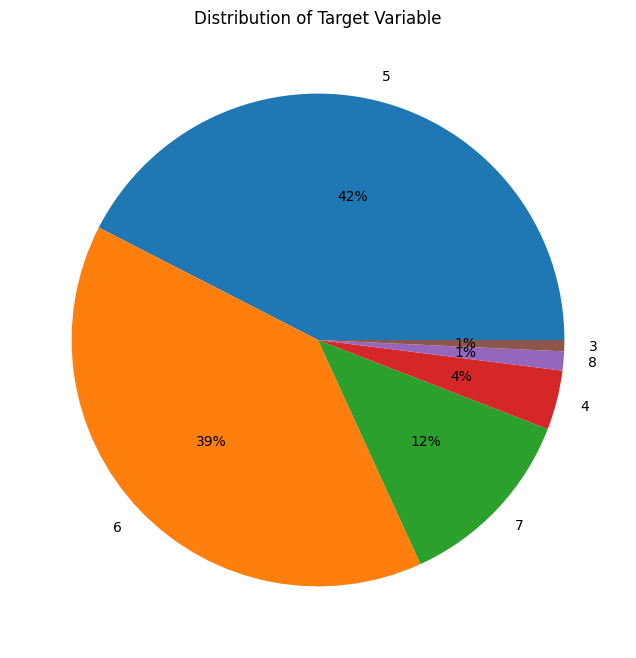

In [95]:
#visualizing the distribution of target variable
print(data['Signal_Strength'].value_counts())
plt.figure(figsize=(20,8))
plt.pie(data['Signal_Strength'].value_counts(),labels=['5','6','7','4','8','3'],autopct='%.0f%%')
plt.title("Distribution of Target Variable")

* We can see that majority of the values in the target variable is 5 or 6.
* There are very few records for class 3, 8 and 4
* So the data is unbalanced
* Also there are 240 duplicate records in the dataset. We have remove the diplicate records.
*There are no missing values in the dataset.

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Parameter 1      1359 non-null   float64 
 1   Parameter 2      1359 non-null   float64 
 2   Parameter 3      1359 non-null   float64 
 3   Parameter 4      1359 non-null   float64 
 4   Parameter 5      1359 non-null   float64 
 5   Parameter 6      1359 non-null   float64 
 6   Parameter 7      1359 non-null   float64 
 7   Parameter 8      1359 non-null   float64 
 8   Parameter 9      1359 non-null   float64 
 9   Parameter 10     1359 non-null   float64 
 10  Parameter 11     1359 non-null   float64 
 11  Signal_Strength  1359 non-null   category
dtypes: category(1), float64(11)
memory usage: 128.9 KB


In [97]:
#Creating function to plot Histogram and Boxplot
def hist_box_plot(df,col):
  plt.figure(figsize=(20,8))
  plt.subplot(2,2,1)
  sns.histplot(df,x=col,kde=True)
  plt.title("Histogram plot: {}".format(col))
  plt.subplot(2,2,2)
  sns.boxplot(df[col])
  plt.title("Boxplot: {}".format(col))

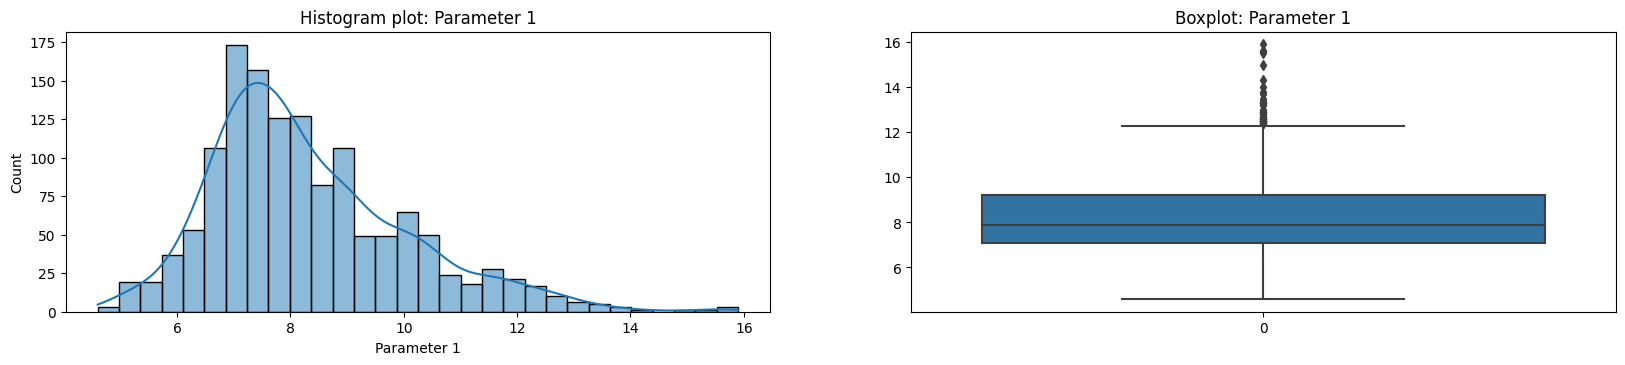

In [98]:
hist_box_plot(data,'Parameter 1')

* The distribution is slightly right tailed
* There are lots of outliers in Parameter 1

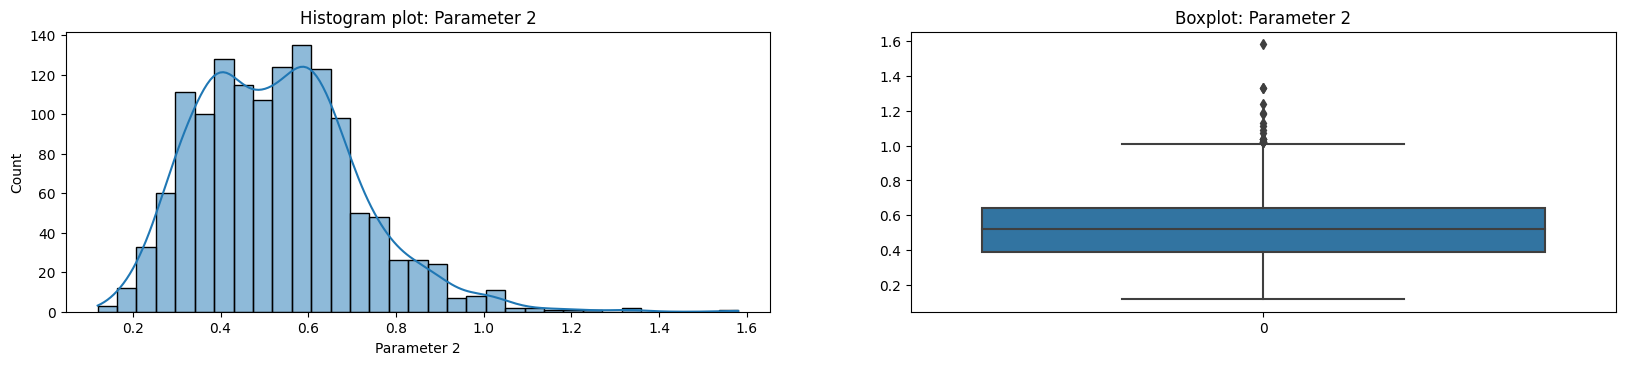

In [99]:
hist_box_plot(data,'Parameter 2')

* There are lots of outlier in Parameter 2.
* The distribution is not normally distributed.

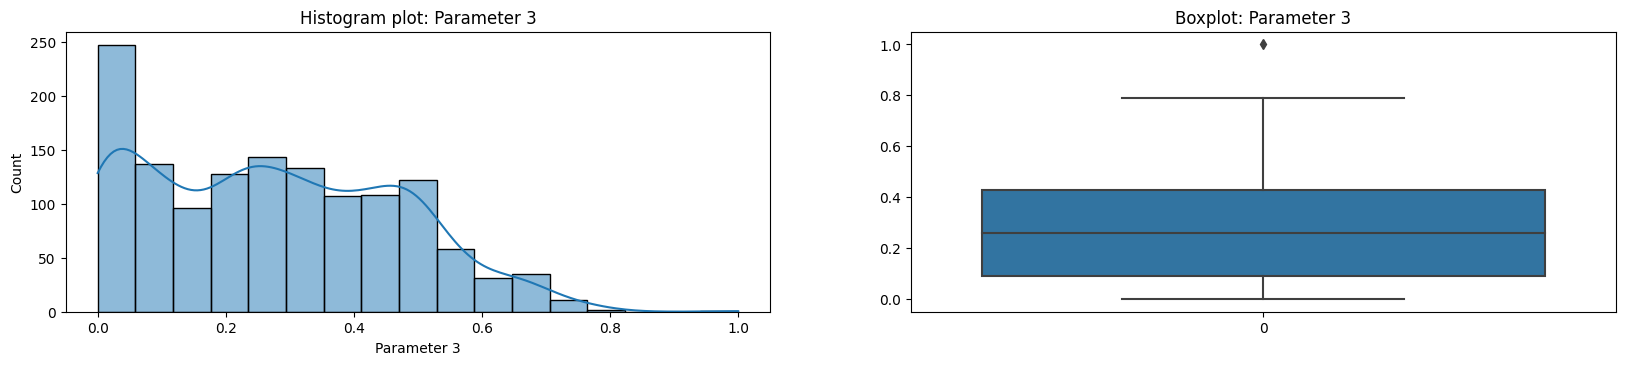

In [100]:
hist_box_plot(data,'Parameter 3')

* There is only one outlier in Parameter 3.

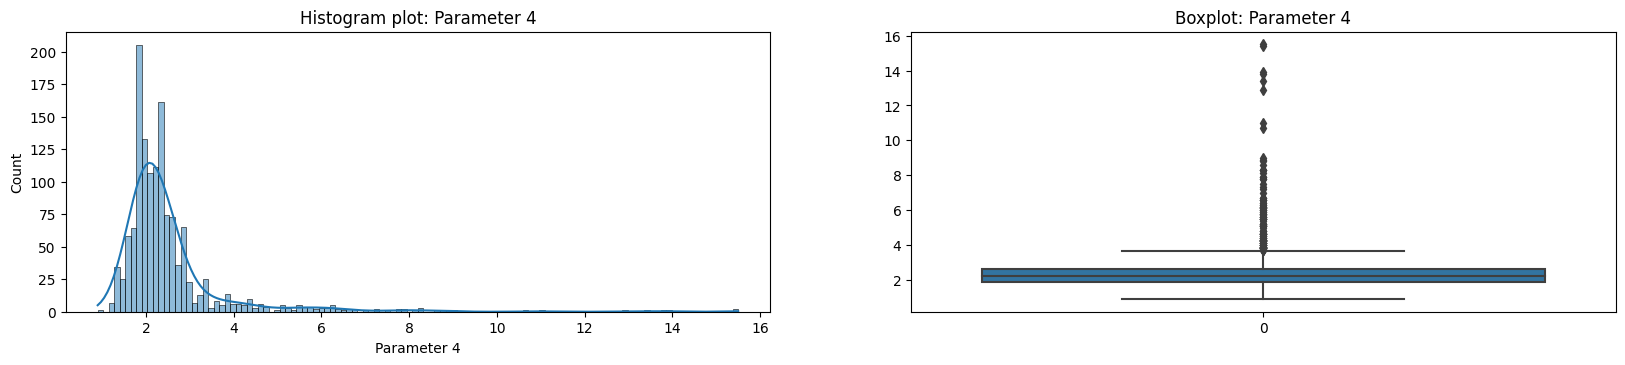

In [101]:
hist_box_plot(data,'Parameter 4')

* There are lots of outlier in Parameter 4.
* Also the distribution is right tailed.

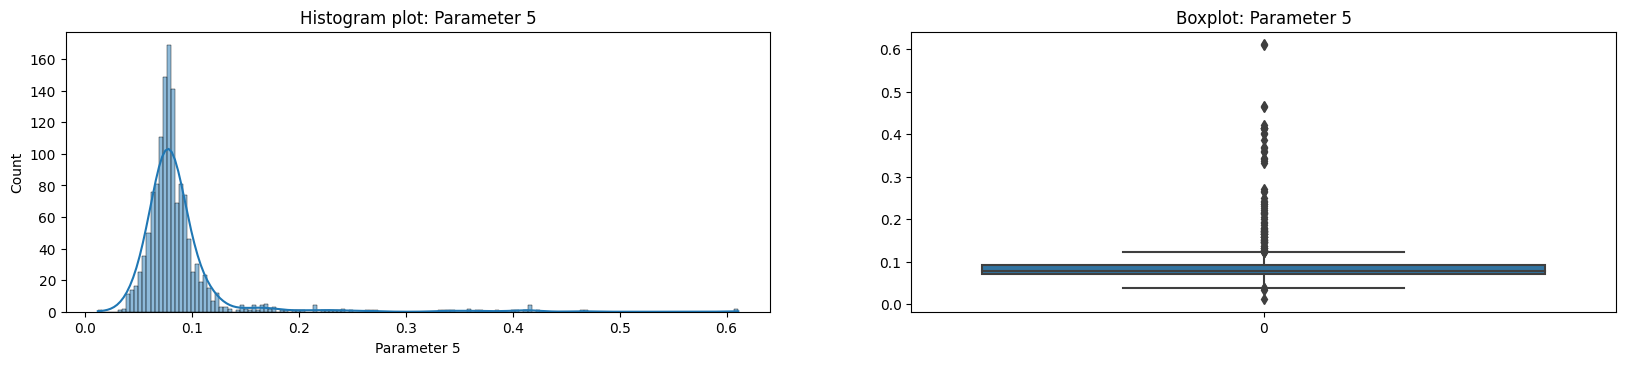

In [102]:
hist_box_plot(data,'Parameter 5')

* There are lots of outlier in parameter 5.

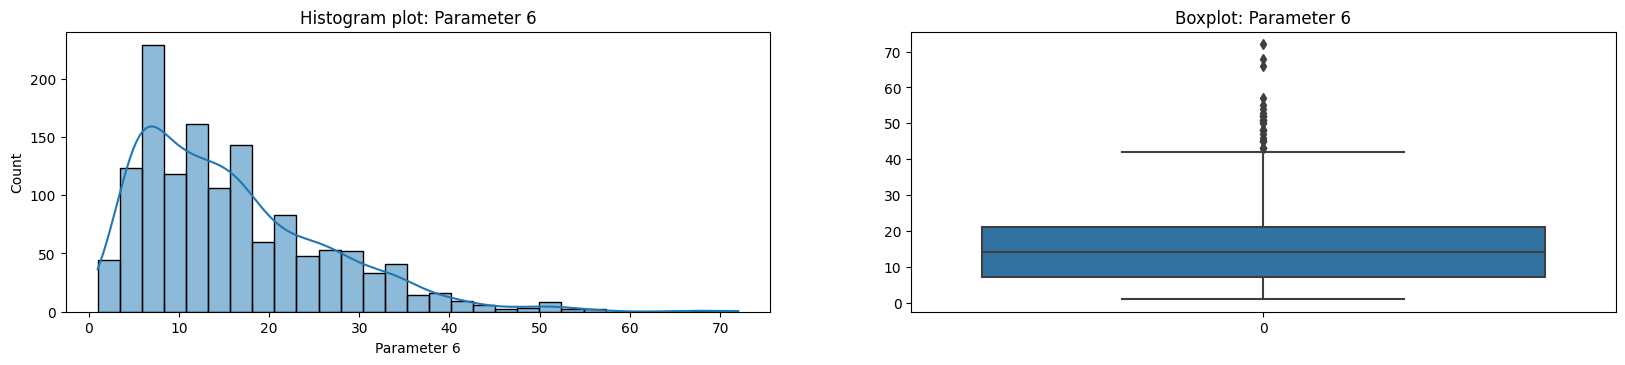

In [103]:
hist_box_plot(data,'Parameter 6')

* There are lots of outlier in parameter 6.

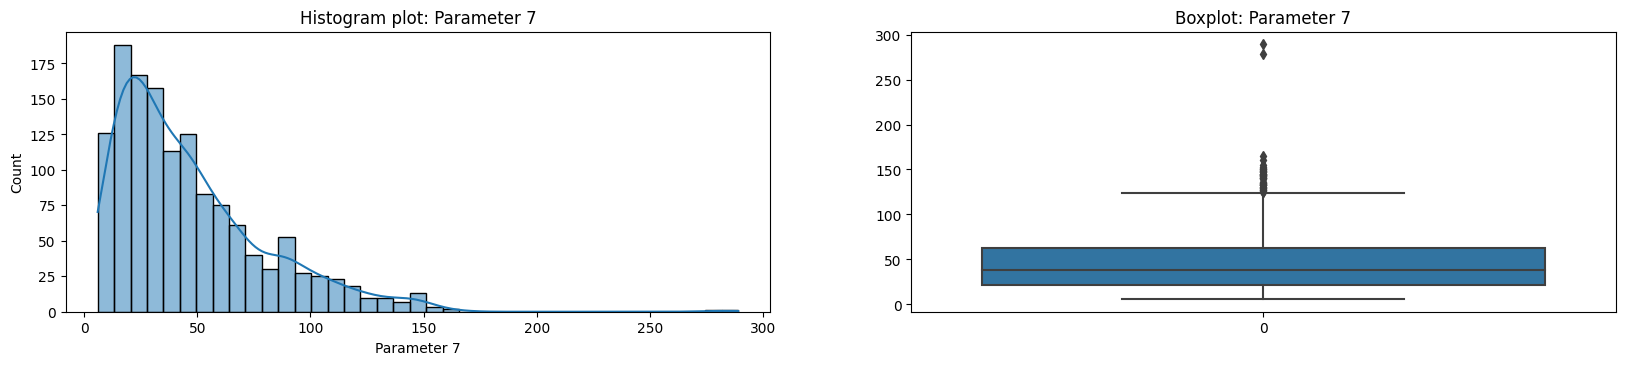

In [104]:
hist_box_plot(data,'Parameter 7')

* There are lots of outlier in Parameter 7.

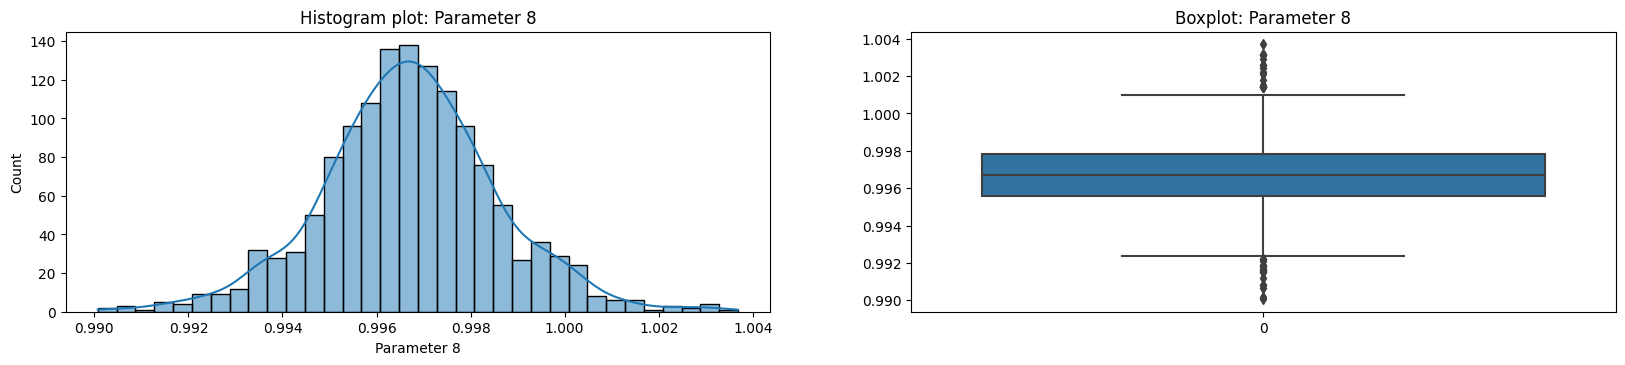

In [105]:
hist_box_plot(data,'Parameter 8')

* There are lots of outlier in parameter 8.
* But the data is normally distributed.

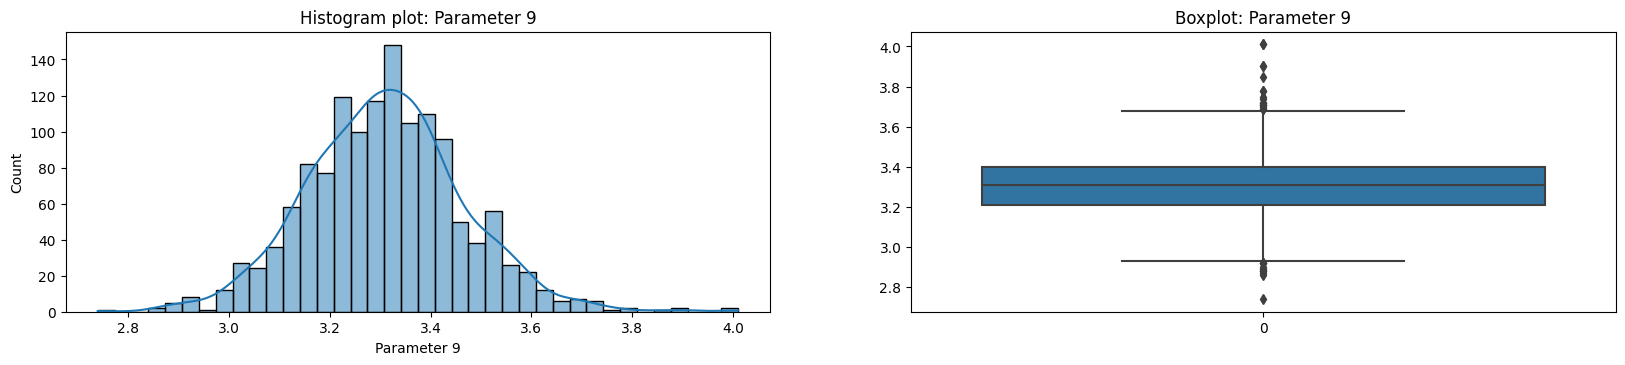

In [106]:
hist_box_plot(data,'Parameter 9')

* There are lots of outlier in parameter 9.

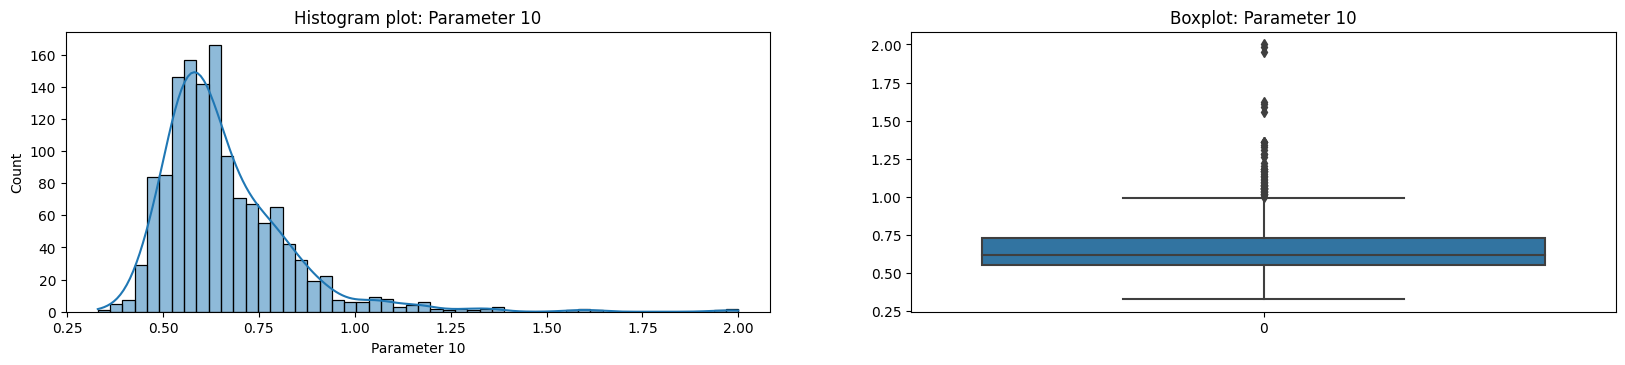

In [107]:
hist_box_plot(data,'Parameter 10')

* The distribution slightly right tailed.
* Also there are lots of out lier.

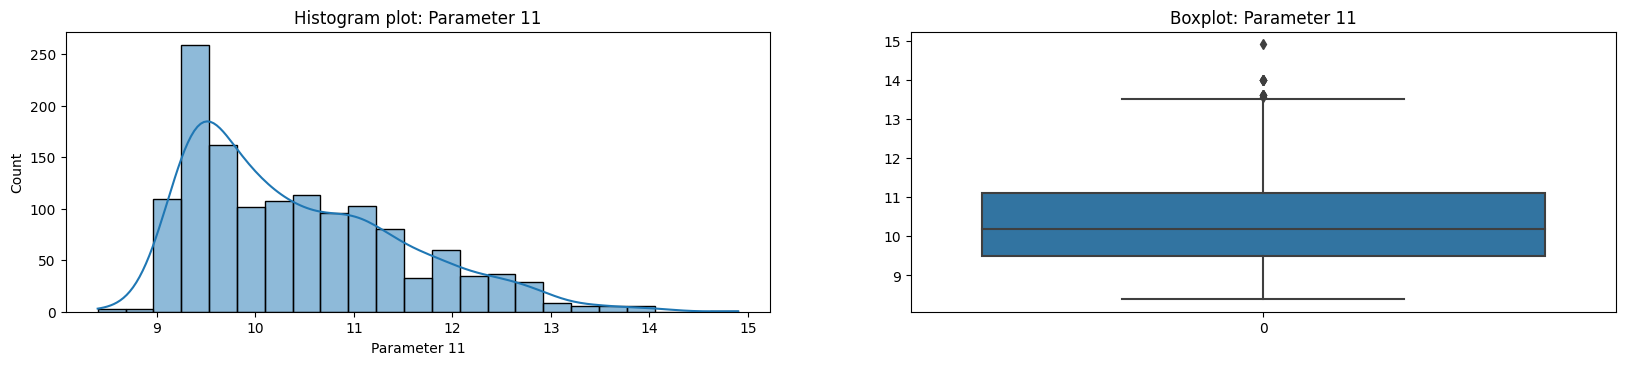

In [108]:
hist_box_plot(data,'Parameter 11')

* There are few outliers in parameter 11.

<ipython-input-109-b417ea373ffa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

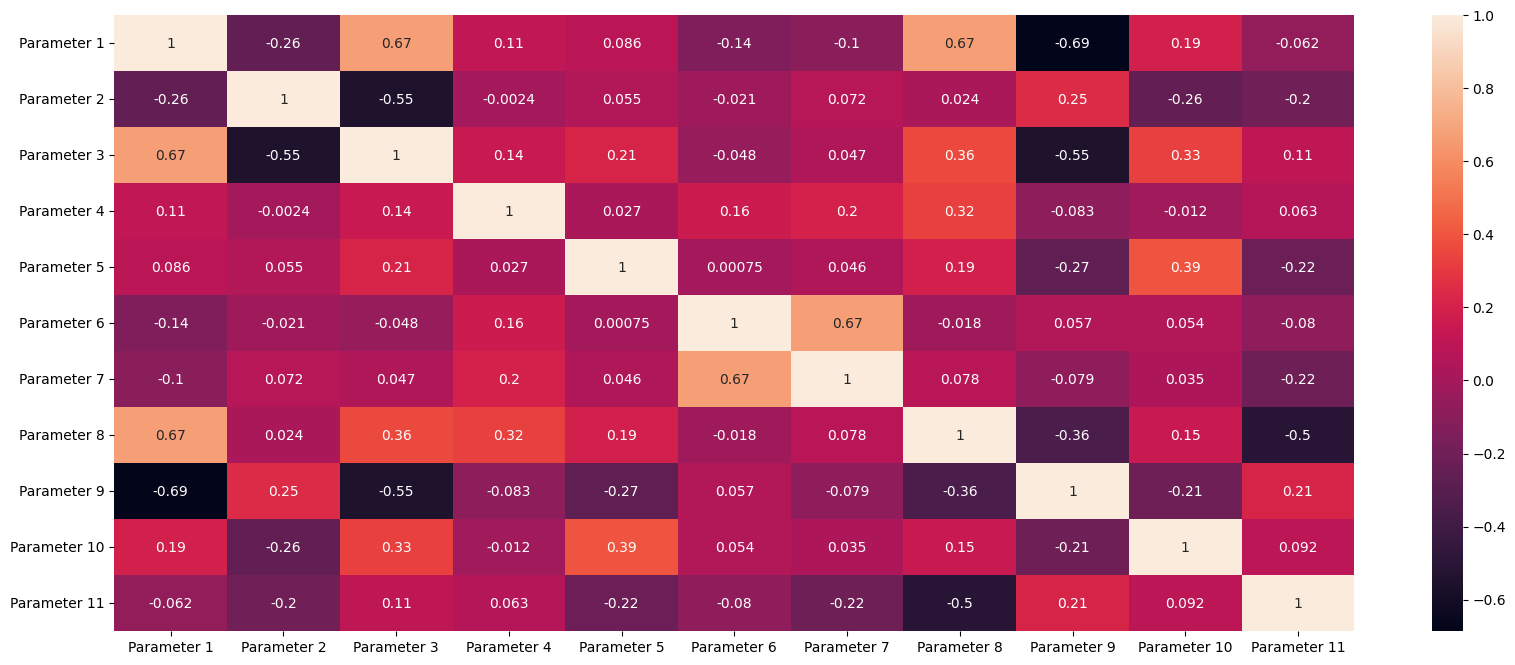

In [109]:
#Correlation plot
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)

There are not strong correlation between the variables.

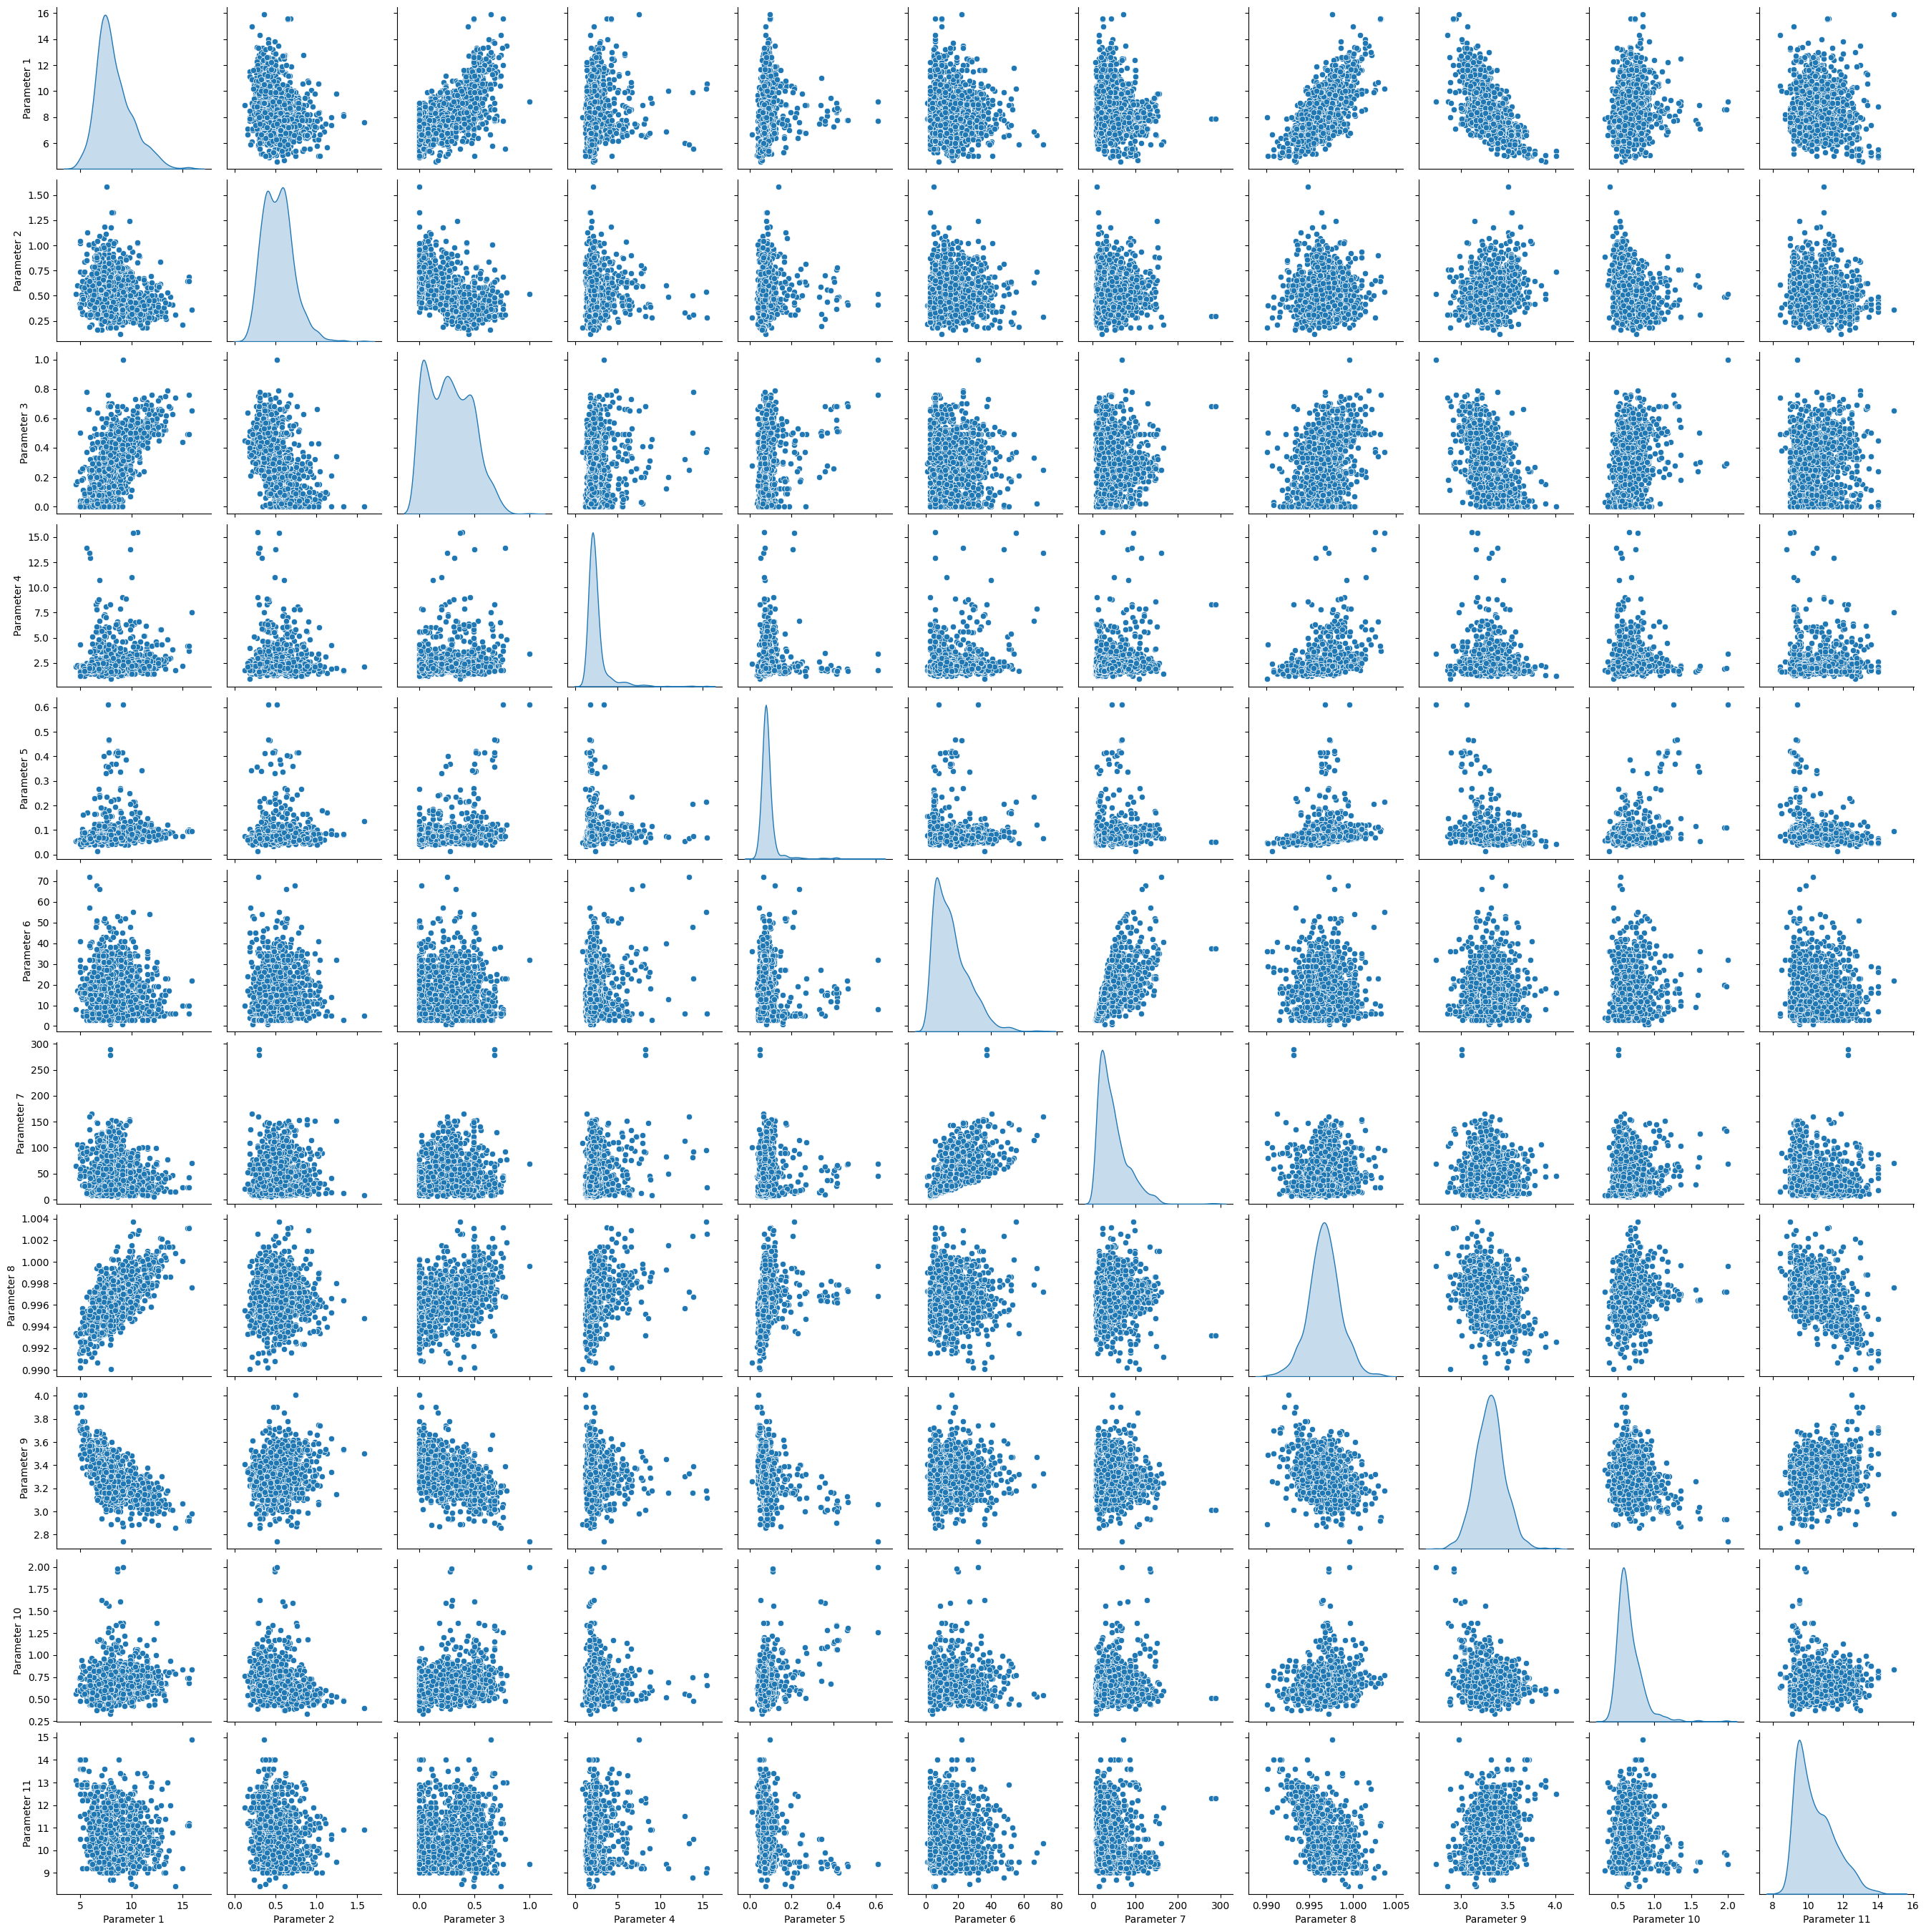

In [110]:
#Pairplot between the variables
sns.pairplot(data,diag_kind='kde')

There are no strong relation between the variables.

In [111]:
#Replacing the outliers with mean
cols = data.select_dtypes('float64').columns
for col in cols:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3-q1
  up = q3 + (iqr*1.5)
  low = q1 - (iqr*1.5)
  df_out = data[col][(data[col] > up) | (data[col] < low)]
  print("No of outlier in {} is".format(col), len(df_out))
  df_in = data[col][(data[col] <= up) & (data[col] >= low)]
  mean = df_in.mean()
  data[col] = np.where(data[col] > up,mean,data[col])
  data[col] = np.where(data[col] < low,mean,data[col])
  df_out = data[col][(data[col] > up) | (data[col] < low)]
  print("No of outlier in {} after treating outlier is".format(col), len(df_out))

No of outlier in Parameter 1 is 41
No of outlier in Parameter 1 after treating outlier is 0
No of outlier in Parameter 2 is 19
No of outlier in Parameter 2 after treating outlier is 0
No of outlier in Parameter 3 is 1
No of outlier in Parameter 3 after treating outlier is 0
No of outlier in Parameter 4 is 126
No of outlier in Parameter 4 after treating outlier is 0
No of outlier in Parameter 5 is 87
No of outlier in Parameter 5 after treating outlier is 0
No of outlier in Parameter 6 is 26
No of outlier in Parameter 6 after treating outlier is 0
No of outlier in Parameter 7 is 45
No of outlier in Parameter 7 after treating outlier is 0
No of outlier in Parameter 8 is 35
No of outlier in Parameter 8 after treating outlier is 0
No of outlier in Parameter 9 is 28
No of outlier in Parameter 9 after treating outlier is 0
No of outlier in Parameter 10 is 55
No of outlier in Parameter 10 after treating outlier is 0
No of outlier in Parameter 11 is 12
No of outlier in Parameter 11 after treati

**Data Preprocesing**

In [112]:
#Splitting the data
x = data.drop(['Signal_Strength'],axis=1)
y = data['Signal_Strength']

In [113]:
#Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=1)

In [114]:
#Printing the shape of all 4 variables
print("shape of x_train:",x_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (951, 11)
shape of x_test: (408, 11)
shape of y_train: (951,)
shape of y_test: (408,)


All the 4 variables are in sync.

In [115]:
#Scaling the independent variable
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [116]:
#Transforming the target variable
y_train = pd.get_dummies(y_train)

#**Model Training & Evaluation**

In [117]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**MODEL1**

In [ ]:
#Initialized the ANN and the hidden layers
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(activation = 'relu', input_dim=11, units=128))
ann.add(tf.keras.layers.Dense(activation = 'relu', units=64))
ann.add(tf.keras.layers.Dense(activation = 'softmax', units=6))

In [ ]:
#compile the model
ann.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 10182 (39.77 KB)
Trainable params: 10182 (39.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Training the model
history=ann.fit(x_train, y_train,
          validation_split=0.2,
          epochs=100,
          batch_size=32,verbose=1)

Epoch 1/100
24/24 [==============================] - 6s 17ms/step - loss: 1.4754 - accuracy: 0.4500 - val_loss: 1.2919 - val_accuracy: 0.5183
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 1.1009 - accuracy: 0.5921 - val_loss: 1.1681 - val_accuracy: 0.5445
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 0.9785 - accuracy: 0.6066 - val_loss: 1.1383 - val_accuracy: 0.5654
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 0.9288 - accuracy: 0.6197 - val_loss: 1.1396 - val_accuracy: 0.5340
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.9006 - accuracy: 0.6184 - val_loss: 1.1256 - val_accuracy: 0.5340
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.8838 - accuracy: 0.6303 - val_loss: 1.1408 - val_accuracy: 0.5236
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 0.8649 - accuracy: 0.6329 - val_loss: 1.1462 - val_accuracy: 0.5288
Epoch 8/100


Text(0.5, 1.0, 'Accuracy vs Val_Accuracy')

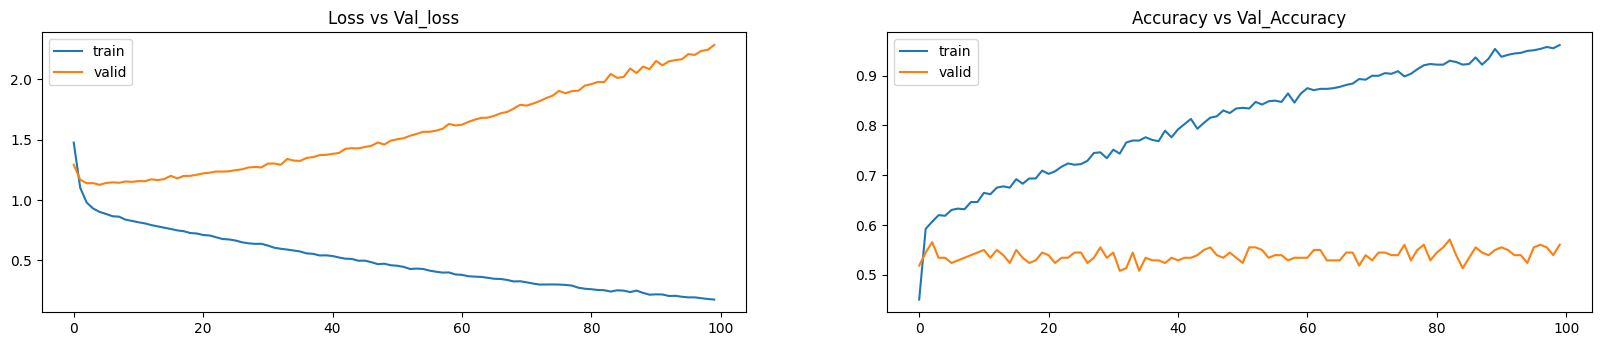

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy and loss at different epochs
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Loss vs Val_loss")
plt.subplot(2,2,2)
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Accuracy vs Val_Accuracy")



In [ ]:
#prediction for y_test
y_prob=ann.predict(x_test)
y_pred=np.argmax(y_prob,axis=1)
dic = {0:3,1:4,2:5,3:6,4:7,5:8}
#y_pred = (y_pred > 0.5)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.replace(dic)
y_pred = y_pred[0].values
y_pred

13/13 [==============================] - 0s 2ms/step


array([6, 5, 7, 6, 5, 7, 6, 7, 7, 7, 5, 6, 6, 5, 4, 6, 6, 6, 5, 6, 6, 5,
       5, 7, 5, 6, 5, 6, 5, 6, 5, 6, 7, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6,
       5, 6, 7, 6, 5, 5, 7, 5, 7, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 6, 6,
       4, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 7, 7, 5, 7, 6, 7, 5, 4,
       3, 7, 5, 7, 5, 5, 6, 5, 4, 6, 7, 7, 5, 5, 5, 5, 6, 7, 6, 6, 6, 6,
       6, 7, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 6, 7, 5, 5, 6, 5, 5, 7, 5, 6,
       5, 6, 5, 5, 7, 6, 6, 6, 7, 6, 5, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 7, 5, 6, 6, 6, 5, 6, 6, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 7, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 6, 7, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 7, 6, 6, 6,
       7, 7, 6, 7, 6, 5, 5, 6, 5, 6, 5, 5, 7, 7, 7, 6, 5, 6, 5, 6, 5, 7,
       6, 5, 6, 5, 7, 6, 6, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5, 6, 5,
       5, 6, 7, 5, 5, 5, 5, 5, 6, 7, 5, 5, 5, 5, 5, 6, 6, 7, 5, 5, 5, 5,
       5, 6, 5, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6, 6,

<Axes: >

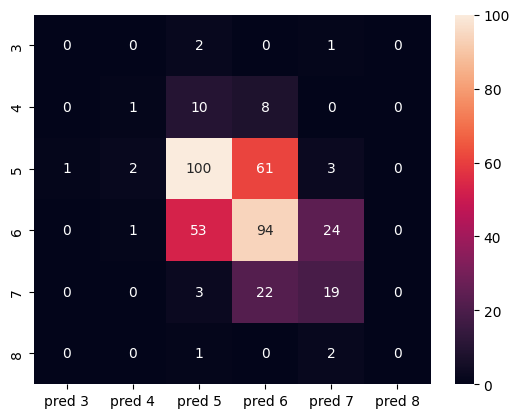

In [ ]:
#Printing he confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cm,index=['3','4','5','6','7','8'],columns=['pred 3','pred 4','pred 5','pred 6','pred 7','pred 8']),annot=True,fmt='0.4g')

In [ ]:
#Printing the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.25      0.05      0.09        19
           5       0.59      0.60      0.60       167
           6       0.51      0.55      0.53       172
           7       0.39      0.43      0.41        44
           8       0.00      0.00      0.00         3

    accuracy                           0.52       408
   macro avg       0.29      0.27      0.27       408
weighted avg       0.51      0.52      0.51       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

In [ ]:
#Printing the scores
print("roc auc score:", roc_auc_score(y_test,y_prob, multi_class='ovr'))
print("precision score:",precision_score(y_test,y_pred,average='weighted'))
print("recall score:", recall_score(y_test,y_pred,average='weighted'))
print("f1 score:", f1_score(y_test,y_pred, average='weighted'))
print("Accuracy score:", accuracy_score(y_test,y_pred))

roc auc score: 0.6426916953312624
precision score: 0.5098587919895289
recall score: 0.5245098039215687
f1 score: 0.5137560324847702
Accuracy score: 0.5245098039215687


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**MODEL2**

In [ ]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Initialized the ANN and the hidden layers
ann1 = tf.keras.models.Sequential()
ann1.add(tf.keras.layers.Dense(activation = 'relu', kernel_initializer='he_uniform', input_dim=11, units=256))
ann1.add(tf.keras.layers.Dropout(0.3))
ann1.add(tf.keras.layers.BatchNormalization())
ann1.add(tf.keras.layers.Dense(activation = 'relu', kernel_initializer='he_uniform', units=128))
ann1.add(tf.keras.layers.Dropout(0.3))
ann1.add(tf.keras.layers.BatchNormalization())
ann1.add(tf.keras.layers.Dense(activation = 'relu', kernel_initializer='he_uniform', units=64))
ann1.add(tf.keras.layers.Dropout(0.3))
ann1.add(tf.keras.layers.BatchNormalization())
ann1.add(tf.keras.layers.Dense(activation = 'relu', kernel_initializer='he_uniform', units=32))
ann1.add(tf.keras.layers.Dropout(0.3))
ann1.add(tf.keras.layers.BatchNormalization())
ann1.add(tf.keras.layers.Dense(activation = 'softmax', units=6))

In [ ]:
#compile the model
ann1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training the model
history=ann1.fit(x_train, y_train,
          validation_split=0.2,
          epochs=100,
          batch_size=16,verbose=1)

Epoch 1/100
48/48 [==============================] - 5s 17ms/step - loss: 2.1281 - accuracy: 0.2316 - val_loss: 1.6459 - val_accuracy: 0.4031
Epoch 2/100
48/48 [==============================] - 0s 10ms/step - loss: 1.8845 - accuracy: 0.3079 - val_loss: 1.5458 - val_accuracy: 0.4398
Epoch 3/100
48/48 [==============================] - 1s 11ms/step - loss: 1.7110 - accuracy: 0.3842 - val_loss: 1.4731 - val_accuracy: 0.4660
Epoch 4/100
48/48 [==============================] - 0s 8ms/step - loss: 1.5708 - accuracy: 0.4342 - val_loss: 1.3786 - val_accuracy: 0.4764
Epoch 5/100
48/48 [==============================] - 0s 8ms/step - loss: 1.4619 - accuracy: 0.4566 - val_loss: 1.3118 - val_accuracy: 0.4974
Epoch 6/100
48/48 [==============================] - 0s 7ms/step - loss: 1.3584 - accuracy: 0.5171 - val_loss: 1.2667 - val_accuracy: 0.5079
Epoch 7/100
48/48 [==============================] - 0s 8ms/step - loss: 1.2881 - accuracy: 0.5355 - val_loss: 1.2386 - val_accuracy: 0.5079
Epoch 8/10

Text(0.5, 1.0, 'Accuracy vs Val_Accuracy')

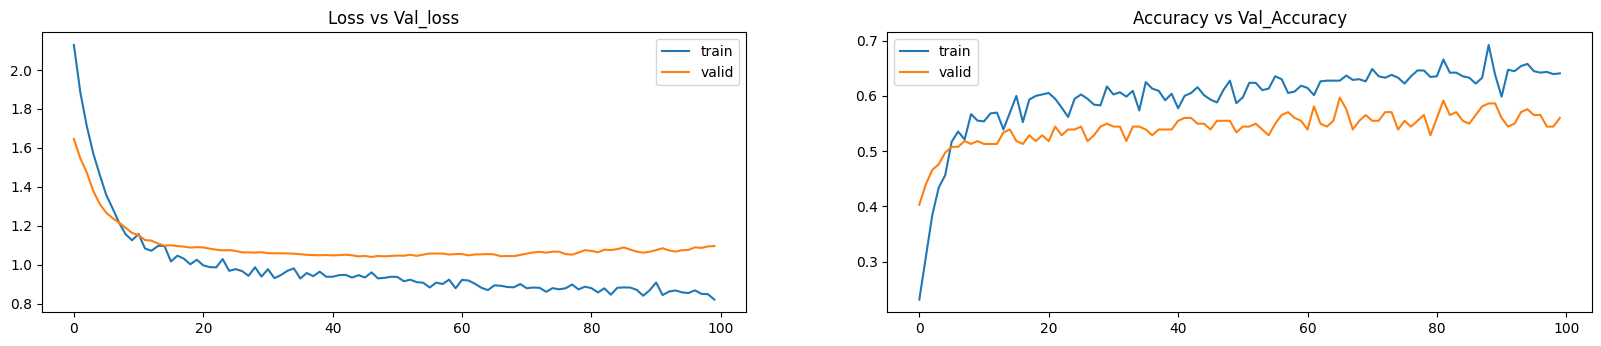

In [ ]:
hist1 = pd.DataFrame(history.history)
hist1['epoch'] = history.epoch

# Plotting accuracy and loss at different epochs
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Loss vs Val_loss")
plt.subplot(2,2,2)
plt.plot(hist1['accuracy'])
plt.plot(hist1['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Accuracy vs Val_Accuracy")



In [ ]:
#prediction for y_test
y_prob=ann1.predict(x_test)
y_pred=np.argmax(y_prob,axis=1)
dic = {0:3,1:4,2:5,3:6,4:7,5:8}
#y_pred = (y_pred > 0.5)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.replace(dic)
y_pred = y_pred[0].values
y_pred

13/13 [==============================] - 0s 2ms/step


array([6, 5, 7, 6, 5, 7, 6, 7, 7, 7, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 7, 6,
       5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6,
       5, 6, 6, 7, 5, 6, 7, 5, 7, 6, 5, 7, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 7, 6, 7, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 7, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 5, 7, 5, 5, 6, 5, 5, 6, 7, 7, 5, 5, 5, 5, 7, 6, 5, 6, 5, 5,
       6, 6, 5, 5, 5, 6, 7, 5, 5, 5, 5, 6, 7, 7, 5, 5, 6, 5, 5, 7, 5, 6,
       5, 5, 5, 5, 7, 6, 6, 7, 7, 6, 5, 6, 6, 5, 6, 7, 6, 6, 5, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 7, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5,
       6, 6, 5, 5, 6, 5, 7, 6, 6, 5, 6, 7, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 5, 7, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6, 6, 6,
       7, 7, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6,
       6, 5, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 5, 6, 5,
       5, 6, 7, 5, 5, 6, 5, 6, 6, 7, 5, 5, 5, 5, 5, 6, 6, 7, 5, 5, 5, 6,
       5, 6, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 6, 7, 5,

<Axes: >

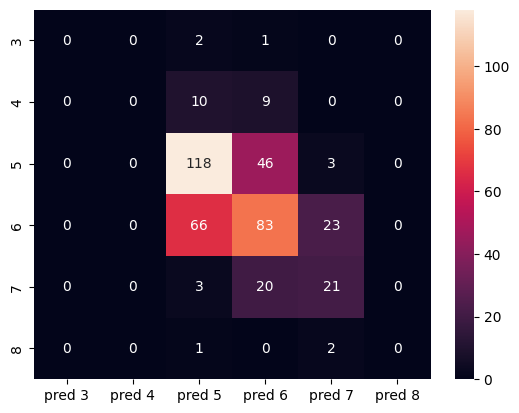

In [ ]:
#Printing he confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cm,index=['3','4','5','6','7','8'],columns=['pred 3','pred 4','pred 5','pred 6','pred 7','pred 8']),annot=True,fmt='0.4g')

In [ ]:
#Printing the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        19
           5       0.59      0.71      0.64       167
           6       0.52      0.48      0.50       172
           7       0.43      0.48      0.45        44
           8       0.00      0.00      0.00         3

    accuracy                           0.54       408
   macro avg       0.26      0.28      0.27       408
weighted avg       0.51      0.54      0.52       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Printing the scores
print("roc auc score:", roc_auc_score(y_test,y_prob, multi_class='ovr'))
print("precision score:",precision_score(y_test,y_pred,average='weighted'))
print("recall score:", recall_score(y_test,y_pred,average='weighted'))
print("f1 score:", f1_score(y_test,y_pred, average='weighted'))
print("Accuracy score:", accuracy_score(y_test,y_pred))

roc auc score: 0.7235939143800714
precision score: 0.5077777117136163
recall score: 0.5441176470588235
f1 score: 0.5233343927686767
Accuracy score: 0.5441176470588235


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




*   In model2, overfitting is reduced as compared to model1.
*   In model1, validation loss ncreases as epochs increase, but in model2 it decreases as epochs increases.
*   In model2 val_accuracy is close to train accuracy as compared to model1. So model2 generalized well.
*   Also all the evaluation scores improved as compared to model1.



Model3 using keras tunner

In [ ]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 10.9 MB/s eta 0:00:00


In [118]:
from kerastuner.tuners import RandomSearch

In [130]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [131]:
def build_model(h):
    model = tf.keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(tf.keras.layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(tf.keras.layers.Dense(6, activation='sigmoid'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [132]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

Reloading Tuner from ./Job_/tuner0.json


In [133]:
tuner.search_space_summary()

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_6

In [134]:
### Searching the best model on X and y train
tuner.search(x_train, y_train,
             epochs=100,
             validation_split = 0.2)

In [135]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 02 summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 32
units_4: 224
units_5: 32
units_6: 256
units_7: 96
units_8: 192
Score: 0.5951134363810221

Trial 07 summary
Hyperparameters:
num_layers: 10
units_0: 96
units_1: 64
learning_rate: 0.01
units_2: 160
units_3: 32
units_4: 192
units_5: 128
units_6: 32
units_7: 64
units_8: 64
units_9: 64
Score: 0.5951134363810221

Trial 22 summary
Hyperparameters:
num_layers: 5
units_0: 256
units_1: 128
learning_rate: 0.01
units_2: 128
units_3: 192
units_4: 256
units_5: 128
units_6: 32
units_7: 192
units_8: 64
units_9: 160
Score: 0.5916230281194051

Trial 05 summary
Hyperparameters:
num_layers: 9
units_0: 160
units_1: 64
learning_rate: 0.0001
units_2: 64
units_3: 160
units_4: 256
units_5: 224
units_6: 96
units_7: 128
units_8: 192
units_9: 224
Score: 0.5916230281194051

Trial 03 summary
Hy

In [136]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [138]:
ann3 = tf.keras.Sequential()
ann3.add(tf.keras.layers.Dense(192,activation='relu',kernel_initializer='he_uniform',input_dim = 11))
ann3.add(tf.keras.layers.Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann3.add(tf.keras.layers.Dense(160,activation='relu',kernel_initializer='he_uniform'))
ann3.add(tf.keras.layers.Dense(32,activation='relu',kernel_initializer='he_uniform'))
ann3.add(tf.keras.layers.Dense(224,activation='relu',kernel_initializer='he_uniform'))
ann3.add(tf.keras.layers.Dense(32,activation='relu',kernel_initializer='he_uniform'))
ann3.add(tf.keras.layers.Dense(256,activation='relu',kernel_initializer='he_uniform'))
ann3.add(tf.keras.layers.Dense(96,activation='relu',kernel_initializer='he_uniform'))
ann3.add(tf.keras.layers.Dense(192,activation='relu',kernel_initializer='he_uniform'))
ann3.add(tf.keras.layers.Dense(6, activation = 'sigmoid'))

In [139]:
#compile the model
ann3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [140]:
#Training the model
history=ann3.fit(x_train, y_train,
          validation_split=0.2,
          epochs=100,
          batch_size=16,verbose=1)

Epoch 1/100
48/48 [==============================] - 5s 11ms/step - loss: 1.2442 - accuracy: 0.5118 - val_loss: 1.1439 - val_accuracy: 0.5288
Epoch 2/100
48/48 [==============================] - 0s 6ms/step - loss: 0.9687 - accuracy: 0.6066 - val_loss: 1.1490 - val_accuracy: 0.5079
Epoch 3/100
48/48 [==============================] - 0s 6ms/step - loss: 0.9113 - accuracy: 0.6211 - val_loss: 1.2442 - val_accuracy: 0.5288
Epoch 4/100
48/48 [==============================] - 0s 6ms/step - loss: 0.8653 - accuracy: 0.6447 - val_loss: 1.1585 - val_accuracy: 0.5183
Epoch 5/100
48/48 [==============================] - 0s 7ms/step - loss: 0.8099 - accuracy: 0.6579 - val_loss: 1.3572 - val_accuracy: 0.5288
Epoch 6/100
48/48 [==============================] - 0s 7ms/step - loss: 0.7722 - accuracy: 0.6816 - val_loss: 1.4272 - val_accuracy: 0.5131
Epoch 7/100
48/48 [==============================] - 0s 6ms/step - loss: 0.7512 - accuracy: 0.6829 - val_loss: 1.3454 - val_accuracy: 0.5340
Epoch 8/100


Text(0.5, 1.0, 'Accuracy vs Val_Accuracy')

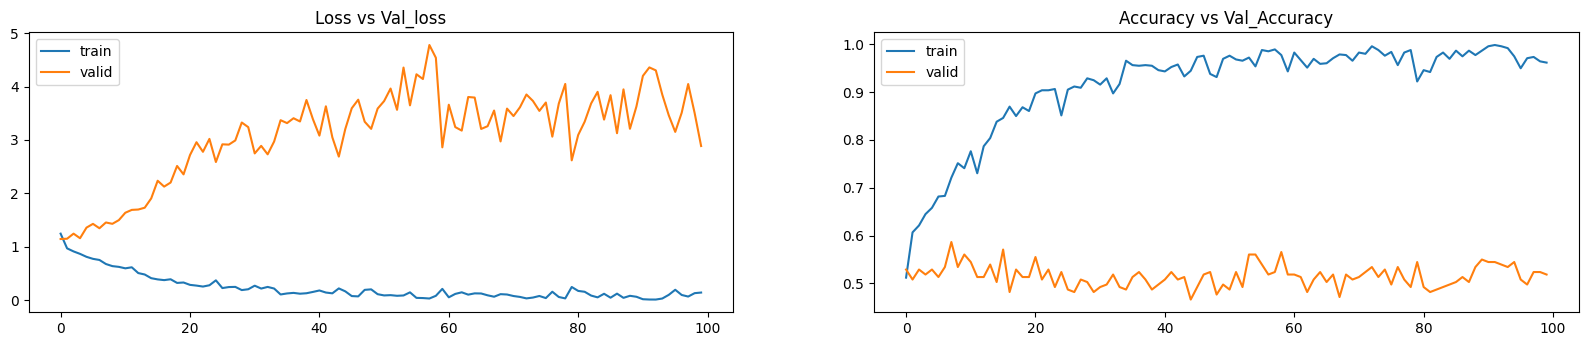

In [142]:
hist1 = pd.DataFrame(history.history)
hist1['epoch'] = history.epoch

# Plotting accuracy and loss at different epochs
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Loss vs Val_loss")
plt.subplot(2,2,2)
plt.plot(hist1['accuracy'])
plt.plot(hist1['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Accuracy vs Val_Accuracy")



In [149]:
#prediction for y_test
y_prob=ann3.predict(x_test)
y_pred=np.argmax(y_prob,axis=1)
dic = {0:3,1:4,2:5,3:6,4:7,5:8}
#y_pred = (y_pred > 0.5)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.replace(dic)
y_pred = y_pred[0].values
y_pred

13/13 [==============================] - 0s 2ms/step


array([6, 5, 7, 6, 5, 6, 6, 7, 7, 7, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 7, 5,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 7, 7, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       5, 6, 6, 6, 5, 5, 7, 5, 7, 6, 5, 7, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6,
       4, 6, 7, 6, 5, 5, 5, 5, 5, 6, 7, 5, 5, 5, 7, 5, 5, 7, 6, 6, 6, 6,
       5, 6, 6, 7, 5, 5, 6, 5, 4, 6, 7, 7, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 5, 7, 7, 5, 5, 5, 5, 6, 7, 7, 5, 5, 6, 5, 5, 7, 5, 6,
       5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 7, 6, 6, 7, 5, 5, 5, 6, 5, 5,
       6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 7, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5,
       6, 5, 4, 4, 7, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6,
       7, 6, 6, 7, 6, 5, 5, 5, 5, 6, 5, 5, 6, 7, 6, 5, 5, 5, 5, 6, 5, 6,
       6, 5, 6, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 6, 7, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6,
       5, 6, 5, 6, 6, 7, 6, 5, 5, 7, 5, 5, 5, 6, 6,

<Axes: >

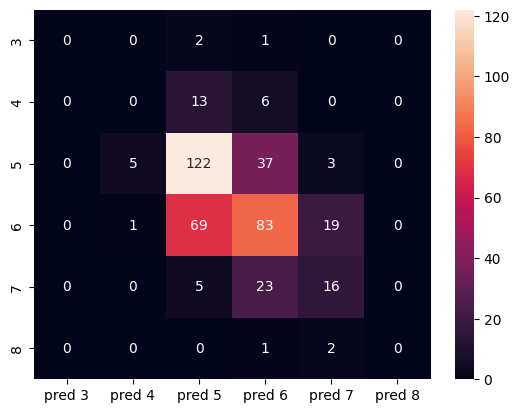

In [150]:
#Printing he confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cm,index=['3','4','5','6','7','8'],columns=['pred 3','pred 4','pred 5','pred 6','pred 7','pred 8']),annot=True,fmt='0.4g')

In [151]:
#Printing the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        19
           5       0.58      0.73      0.65       167
           6       0.55      0.48      0.51       172
           7       0.40      0.36      0.38        44
           8       0.00      0.00      0.00         3

    accuracy                           0.54       408
   macro avg       0.25      0.26      0.26       408
weighted avg       0.51      0.54      0.52       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [153]:
#Printing the scores
#print("roc auc score:", roc_auc_score(y_test,y_prob, multi_class='ovr'))
print("precision score:",precision_score(y_test,y_pred,average='weighted'))
print("recall score:", recall_score(y_test,y_pred,average='weighted'))
print("f1 score:", f1_score(y_test,y_pred, average='weighted'))
print("Accuracy score:", accuracy_score(y_test,y_pred))

precision score: 0.5115252158425907
recall score: 0.5416666666666666
f1 score: 0.5219537534082547
Accuracy score: 0.5416666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see that the accuracy is very low even after tunning the model. This is because the data is highly unbalaced. We need more sample to improve the model. We cannot go ahead with the model for deployment.

In [ ]:
#Saving the model
ann.save('/content/drive/My Drive/Colab Notebooks/ann.hdf5')
ann1.save('/content/drive/My Drive/Colab Notebooks/ann1.hdf5')


In [155]:
ann3.save('/content/drive/My Drive/Colab Notebooks/ann3.hdf5')